# <center> Customer Predictions and Discount Suggestions <center>   

---
---

## Project Goal
---
   Hasil uji test covid dapat menjadi gambaran seberapa besar kebutuhan test covid dulakuan oleh masyarakat. Semakin besar angka positif covid 19 dalam suatu wilayah akan menjadi perhatian bagi masyarakan dan pemerintah terhadap wilayah tersebut. Lebih lanjut kebutuhan test covid 19 akan menjadi semakin meningkat. Uji test covid bukan lagi menjadi syarat administrasi dalam kegiatan masyarakat, tetapi dapat menjadi suatu kewajiban mengingat hasil positif covid sangat signifikan.
   
Project ini akan mencari model klasifikasi dari data ClinicAcov untuk memprediksi hasil uji test Covid 19. Model klasifikasi yang didapat selanjutnya akan dilakukan prediksi dengan kombinasi karakteristik setiap cabang/Wilayah. Hasil prediksi tiap cabang akan menjadi gambaran untuk mengetahui potensi customer yang akan memiliki hasil positive test Covid 19. 

Dengan mengetahui potensi dan prediksi hasil test covid 19, ClinicAcov dapat mengetahui Package mana yang sebaiknya ditawarkan, hari apa saja yang menjadi potensi, dan tanggal berapa saja customer dengan hasil test covid positive dapat melakukan test dalam tiap cabang. Salah satu penerapan atas hasil prediksi ini adalah ClinicAcov dapat memberikan diskon yang tepat sasaran kepada customer dengan syarat dan ketentuan berdasarkan kombinasi karakteristik tiap cabang.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('ClinicACov.xlsx')

In [3]:
df.head()

,TrxNumber,TrxType,Branch,Package,PatientBirthDate,PatientGender,PromoCode,GrandTotal,TotalDiscount,AdminFee,TotalAmount,OrderCreated,MedicalResult
0,1389414778136428544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1997-12-11,f,-,199000,0,3000,202000,2021-05-04 10:01:11,Negative
1,1389414778136428544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1997-12-11,f,-,199000,0,3000,202000,2021-05-04 10:01:11,Negative
2,1389442470126813184,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1998-08-17,m,-,199000,0,3000,202000,2021-05-04 11:51:14,Negative
3,1389442470126813184,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1998-08-17,m,-,199000,0,3000,202000,2021-05-04 11:51:14,Positive
4,1389589423187820544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1987-03-06,f,-,199000,0,2850,201850,2021-05-04 21:35:10,Negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TrxNumber         1000 non-null   int64         
 1   TrxType           1000 non-null   object        
 2   Branch            1000 non-null   object        
 3   Package           1000 non-null   object        
 4   PatientBirthDate  1000 non-null   datetime64[ns]
 5   PatientGender     1000 non-null   object        
 6   PromoCode         1000 non-null   object        
 7   GrandTotal        1000 non-null   int64         
 8   TotalDiscount     1000 non-null   int64         
 9   AdminFee          1000 non-null   int64         
 10  TotalAmount       1000 non-null   int64         
 11  OrderCreated      1000 non-null   datetime64[ns]
 12  MedicalResult     1000 non-null   object        
dtypes: datetime64[ns](2), int64(5), object(6)
memory usage: 101.7+ KB


In [5]:
df.describe()

,TrxNumber,GrandTotal,TotalDiscount,AdminFee,TotalAmount
count,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1.000000e+03
mean,1.400462e+18,7.662540e+05,3718.650000,3632.631000,7.661680e+05
std,5.940340e+15,7.264953e+05,29026.425513,4236.162801,7.263984e+05
min,1.388025e+18,1.990000e+05,0.000000,0.000000,1.720000e+05
25%,1.395276e+18,3.980000e+05,0.000000,2850.000000,4.008500e+05
50%,1.398494e+18,5.970000e+05,0.000000,2850.000000,5.998500e+05
75%,1.406808e+18,7.960000e+05,0.000000,2850.000000,8.204770e+05
max,1.406998e+18,3.596000e+06,300000.000000,26250.000000,3.598850e+06


In [6]:
for n in df[['TrxType', 'Branch', 'Package','PatientGender', 'PromoCode', 'TotalDiscount', 
             'AdminFee', 'MedicalResult']].columns:
    print(n)
    print(f'Jumlah unique = {df[n].nunique()}')
    print(f"{df[n].unique()} \n")

TrxType
Jumlah unique = 2
['on ClinicACov stand' 'client home'] 

Branch
Jumlah unique = 8
['ClinicACov Cikarang Selatan' 'ClinicACov Cikarang Pusat'
 'ClinicACov Cileungsi' 'ClinicACov Bekasi Timur'
 'ClinicACov Bekasi Selatan' 'ClinicACov Margonda' 'ClinicACov Cibubur'
 'ClinicACov Cikarang Utara'] 

Package
Jumlah unique = 4
['Swab Antigen on ClinicACov stand (Result in 30Minutes)'
 'Swab PCR on ClinicACov stand (Result in 1x24Hours)'
 'Swab PCR Client Home (Result in D+1)'
 'Swab Antigen Client Home (Result in 30Minutes)'] 

PatientGender
Jumlah unique = 2
['f' 'm'] 

PromoCode
Jumlah unique = 3
['-' 'ANTIGENCLINICACOVHOME3' 'CLINICACOV15'] 

TotalDiscount
Jumlah unique = 4
[     0 300000  29850  50000] 

AdminFee
Jumlah unique = 8
[ 3000  2850 26250  3850     0 24477  4975  9950] 

MedicalResult
Jumlah unique = 2
['Negative' 'Positive'] 



In [7]:
df.isnull().sum()

TrxNumber           0
TrxType             0
Branch              0
Package             0
PatientBirthDate    0
PatientGender       0
PromoCode           0
GrandTotal          0
TotalDiscount       0
AdminFee            0
TotalAmount         0
OrderCreated        0
MedicalResult       0
dtype: int64

## Exploring Data Analysis

### Duplicate Check

In [8]:
df[df.duplicated(keep = 'last')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 0 to 998
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TrxNumber         592 non-null    int64         
 1   TrxType           592 non-null    object        
 2   Branch            592 non-null    object        
 3   Package           592 non-null    object        
 4   PatientBirthDate  592 non-null    datetime64[ns]
 5   PatientGender     592 non-null    object        
 6   PromoCode         592 non-null    object        
 7   GrandTotal        592 non-null    int64         
 8   TotalDiscount     592 non-null    int64         
 9   AdminFee          592 non-null    int64         
 10  TotalAmount       592 non-null    int64         
 11  OrderCreated      592 non-null    datetime64[ns]
 12  MedicalResult     592 non-null    object        
dtypes: datetime64[ns](2), int64(5), object(6)
memory usage: 64.8+ KB


In [9]:
# Drop data duplocate
df = df.drop_duplicates()
df.head()

,TrxNumber,TrxType,Branch,Package,PatientBirthDate,PatientGender,PromoCode,GrandTotal,TotalDiscount,AdminFee,TotalAmount,OrderCreated,MedicalResult
0,1389414778136428544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1997-12-11,f,-,199000,0,3000,202000,2021-05-04 10:01:11,Negative
2,1389442470126813184,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1998-08-17,m,-,199000,0,3000,202000,2021-05-04 11:51:14,Negative
3,1389442470126813184,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1998-08-17,m,-,199000,0,3000,202000,2021-05-04 11:51:14,Positive
4,1389589423187820544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1987-03-06,f,-,199000,0,2850,201850,2021-05-04 21:35:10,Negative
5,1389494356792049664,on ClinicACov stand,ClinicACov Cikarang Pusat,Swab Antigen on ClinicACov stand (Result in 30...,1977-10-17,m,-,796000,0,2850,798850,2021-05-04 15:17:24,Negative


Negative    371
Positive     37
Name: MedicalResult, dtype: int64


<AxesSubplot:xlabel='MedicalResult', ylabel='count'>

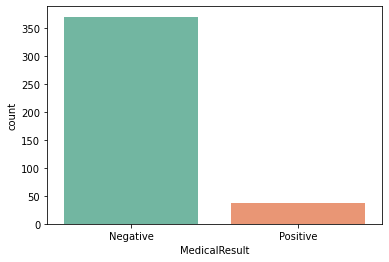

In [10]:
print(df['MedicalResult'].value_counts())
sns.countplot(data=df, x='MedicalResult', palette='Set2')
#plt.savefig('MedicalResult', bbox_inches='tight')

-  Label Positive pada variabel MedicalResult hanya 9% dari keseluruhan hasil MedicalResult

### Branch

ClinicACov Cikarang Pusat      242
ClinicACov Cikarang Selatan     59
ClinicACov Bekasi Timur         58
ClinicACov Cileungsi            24
ClinicACov Margonda             13
ClinicACov Bekasi Selatan        6
ClinicACov Cibubur               4
ClinicACov Cikarang Utara        2
Name: Branch, dtype: int64


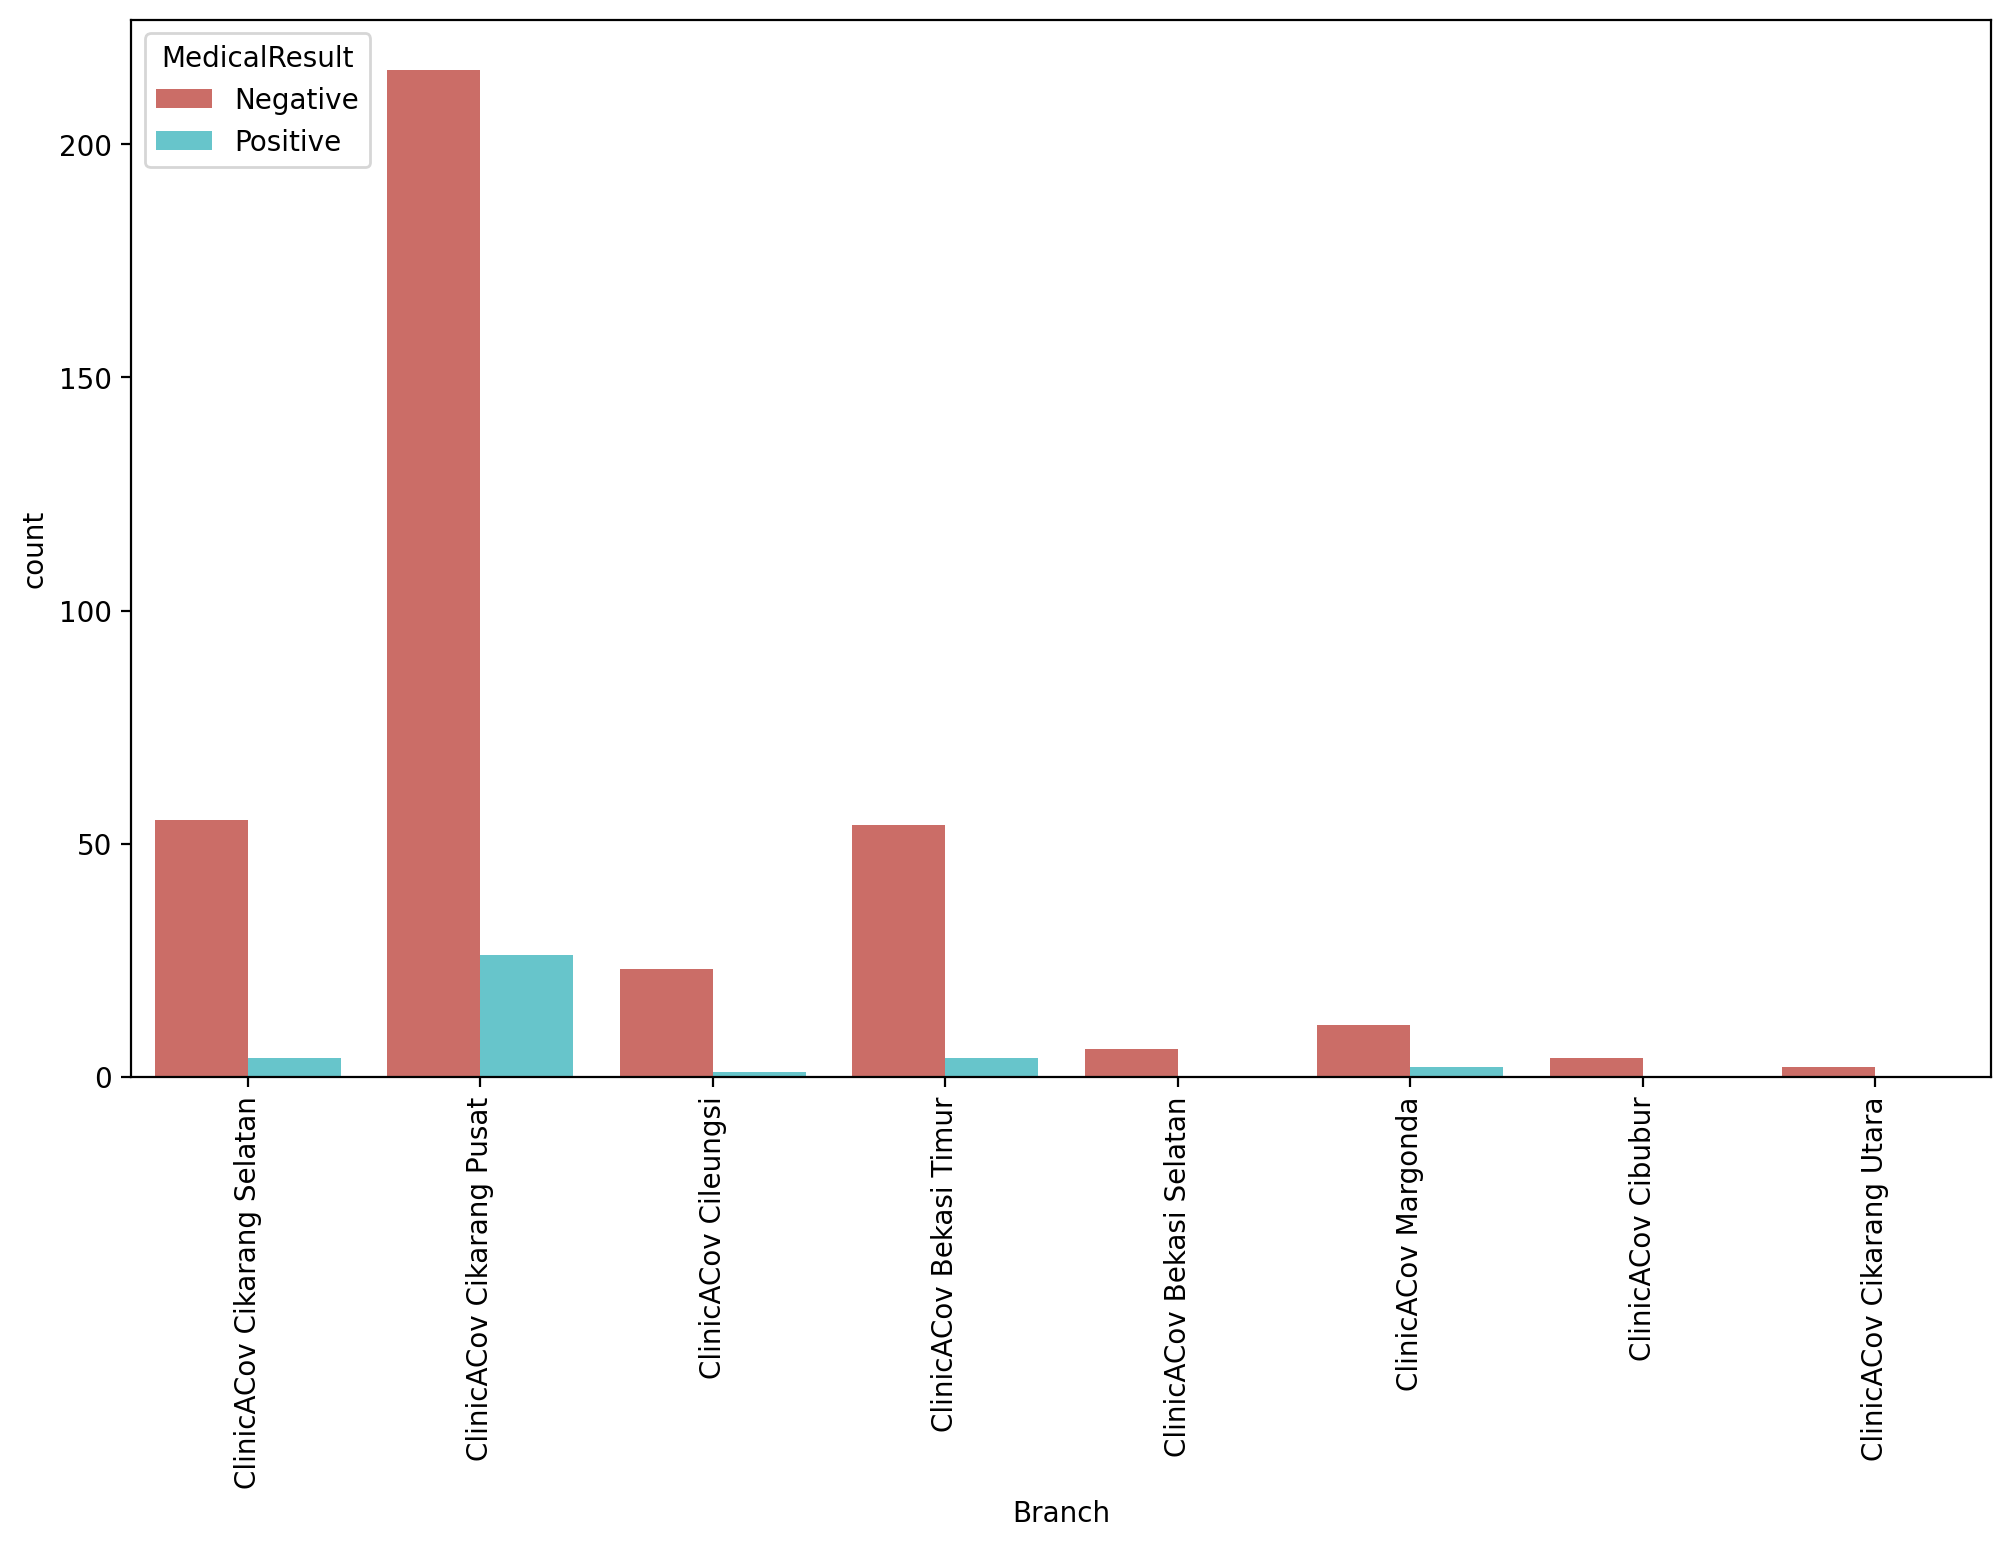

In [11]:
# Branch value counts
print(df['Branch'].value_counts())
# Countplot branch berdasarkan  Medical result
plt.figure(figsize=(12,7), dpi=200)
sns.countplot(data=df, x='Branch', hue='MedicalResult', palette='hls')
plt.xticks(rotation=90);
#plt.savefig('Branch Countplot', bbox_inches='tight')

- Branch dengan customer terbanyak adalah Branch ClinicACov Cikarang Pusat, Branch ini juga memiliki angka customer dengan hasil test positif terbanyak
- Branch ClinicACov Cibubur dan ClinicACov Cikarang Utara adalah Branch dengan customer paling sedikit dan tidak memiliki hasil test Positive.

### Package

Swab Antigen on ClinicACov stand (Result in 30Minutes)    346
Swab PCR on ClinicACov stand (Result in 1x24Hours)         36
Swab Antigen Client Home (Result in 30Minutes)             15
Swab PCR Client Home (Result in D+1)                       11
Name: Package, dtype: int64


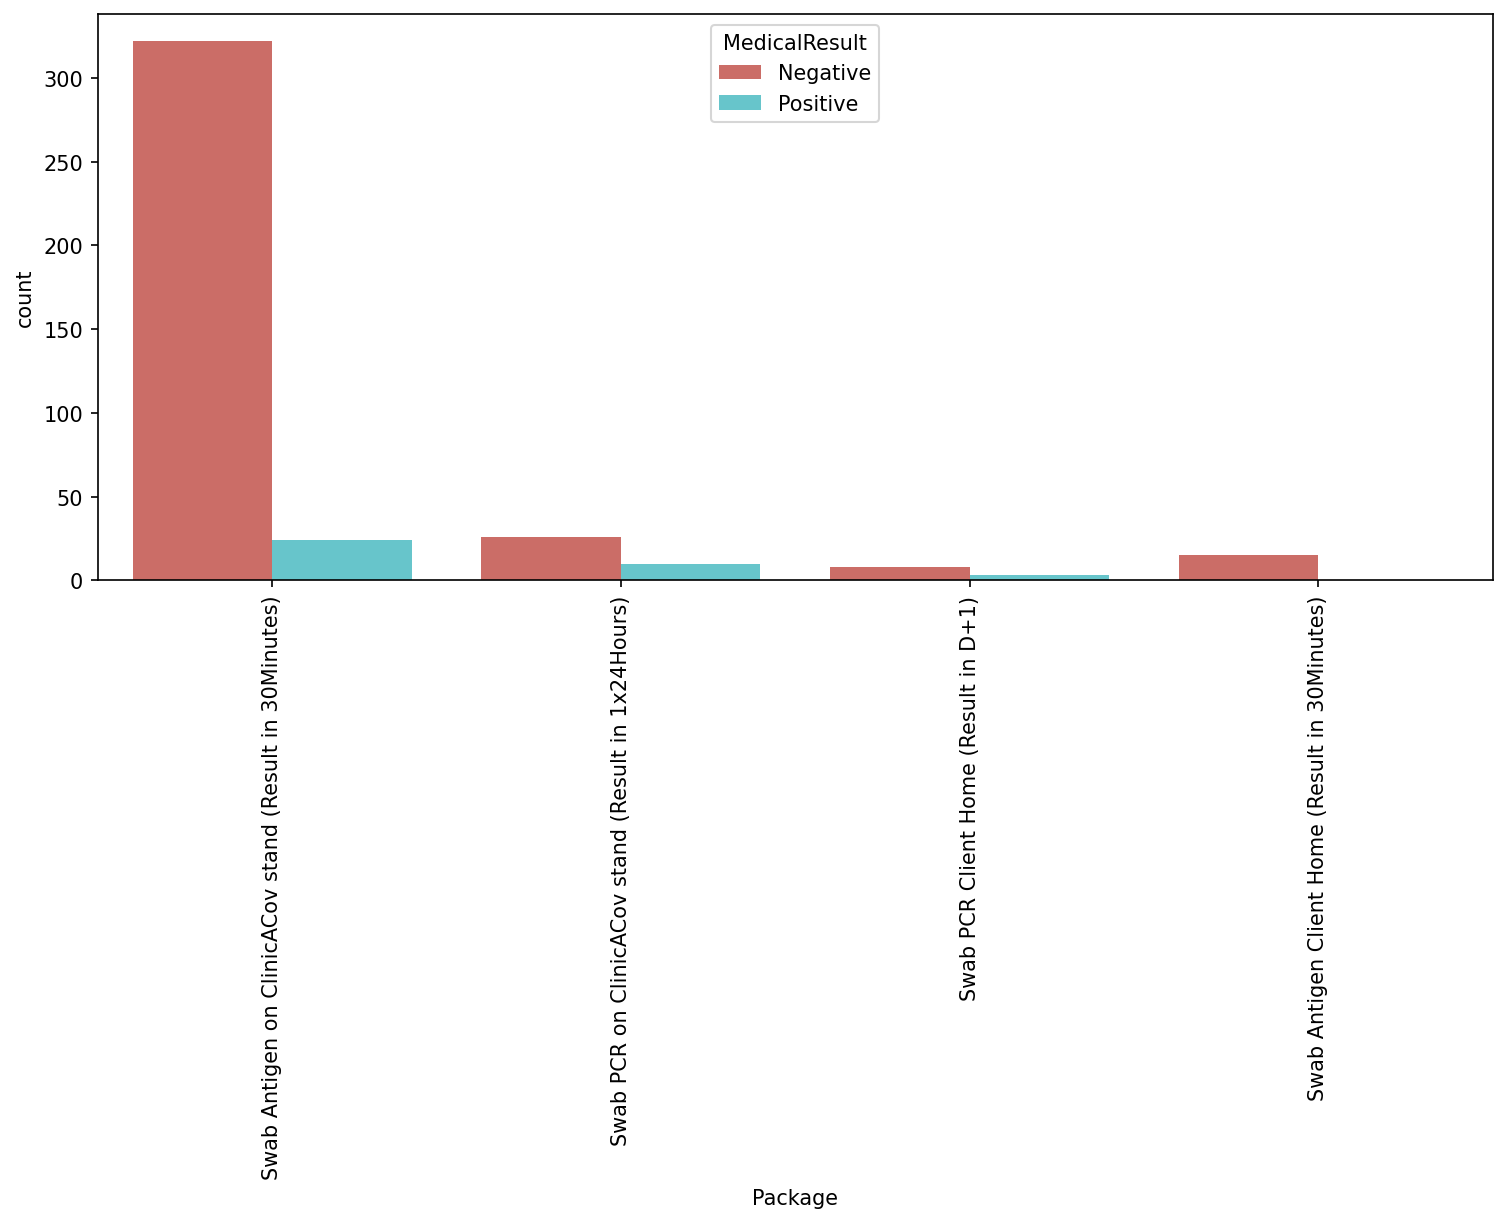

In [12]:
# Package value counts
print(df['Package'].value_counts())
# Countplot Package berdasarkan  Medical result
plt.figure(figsize=(12,5), dpi=150)
sns.countplot(data=df, x='Package', hue='MedicalResult', palette='hls')
plt.xticks(rotation=90);
#plt.savefig('Package Countplot', bbox_inches='tight')

- Package paling sering diorder adalah Swab Antigen on ClinicACov stand (Result in 30Minutes) dan memberikan hasil test covid paling banyak dibandingkan dengan branch lain.

### Birth Date/Age

In [13]:
import datetime
from datetime import date

In [14]:
# Fungsi usia customer
def age(birthdate):
    today = datetime.datetime(2021, 12, 18)
    one_zero = ((today.month, today.day) < (birthdate.month, birthdate.day))
    year_diff = today.year - birthdate.year
    age = year_diff - one_zero
    
    return age
#Usia customer berdasarkan tanggal lahir
df['Age'] = df['PatientBirthDate'].apply(lambda date: age(date))

In [15]:
df.head()

,TrxNumber,TrxType,Branch,Package,PatientBirthDate,PatientGender,PromoCode,GrandTotal,TotalDiscount,AdminFee,TotalAmount,OrderCreated,MedicalResult,Age
0,1389414778136428544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1997-12-11,f,-,199000,0,3000,202000,2021-05-04 10:01:11,Negative,24
2,1389442470126813184,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1998-08-17,m,-,199000,0,3000,202000,2021-05-04 11:51:14,Negative,23
3,1389442470126813184,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1998-08-17,m,-,199000,0,3000,202000,2021-05-04 11:51:14,Positive,23
4,1389589423187820544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1987-03-06,f,-,199000,0,2850,201850,2021-05-04 21:35:10,Negative,34
5,1389494356792049664,on ClinicACov stand,ClinicACov Cikarang Pusat,Swab Antigen on ClinicACov stand (Result in 30...,1977-10-17,m,-,796000,0,2850,798850,2021-05-04 15:17:24,Negative,44


21    23
35    15
34    15
41    14
38    14
Name: Age, dtype: int64


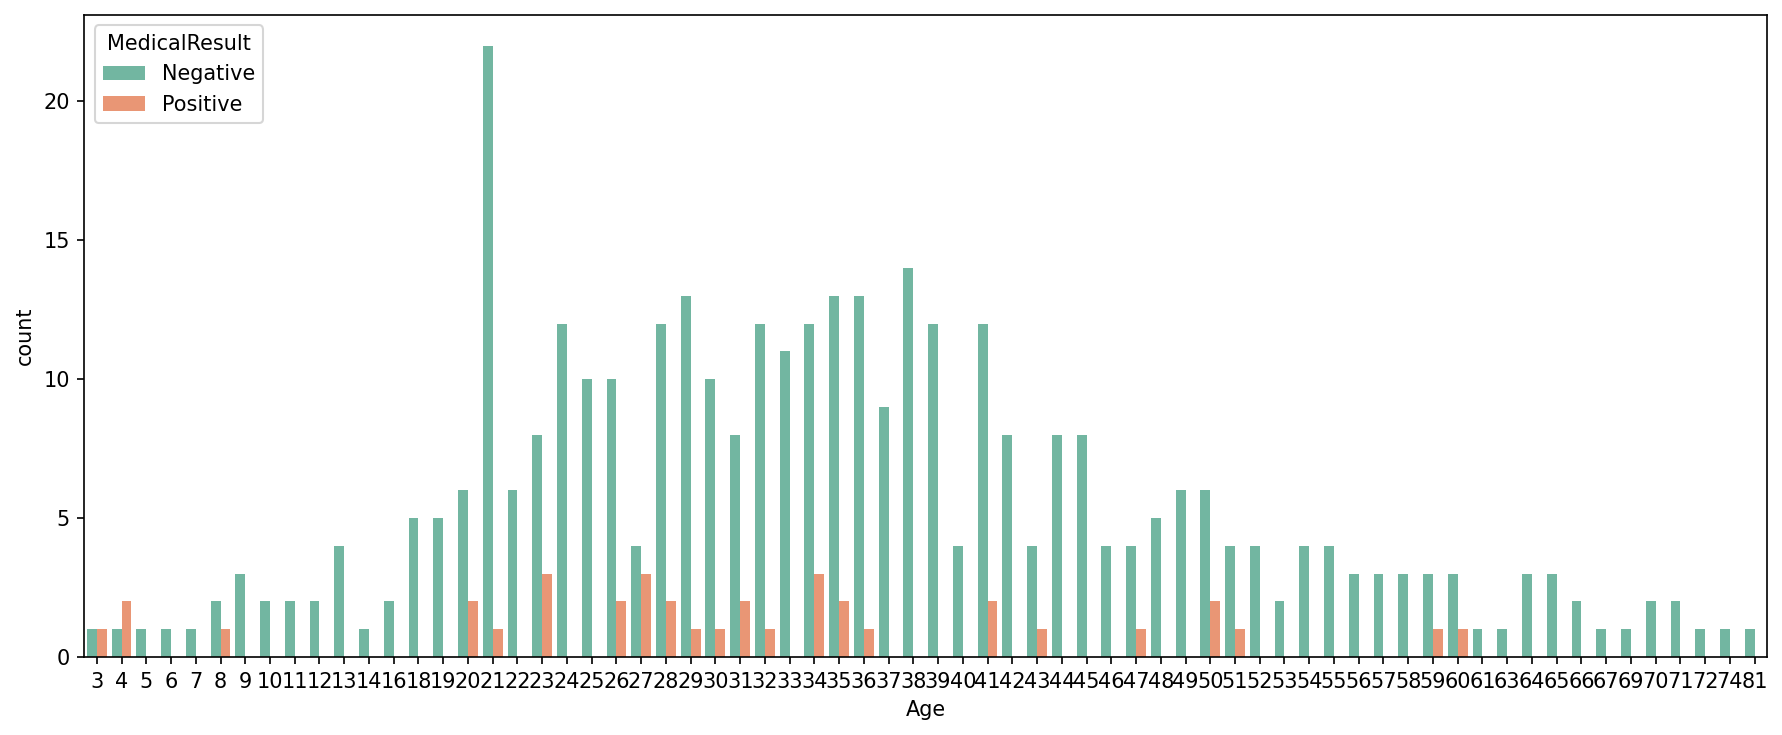

In [16]:
# Age value counts
print(df['Age'].value_counts()[:5])
# Countplot Age berdasarkan  Medical result
plt.figure(figsize=(12,5), dpi=150)
sns.countplot(data=df, x='Age', hue='MedicalResult', palette='Set2')
plt.tight_layout()
#plt.savefig('Age Countplot', bbox_inches='tight');

- Usia paling banyak melakukan test covid adalah usia 21 tahun diikuti usia 35 tahun,34 tahun, 41 tahun, dan 38 tahun.
- Usia yang paling banyak melakukan uji test covid ini adalah usia yang masuk dalam kategori usia kerja aktif yaitu usia 18 hingga 60 tahun, dimana syarat minimum usia untuk bekerja adalah 18 dan maksimal 60 tahun (sebelum pensiun).

### Gender

m    214
f    194
Name: PatientGender, dtype: int64


<AxesSubplot:xlabel='PatientGender', ylabel='count'>

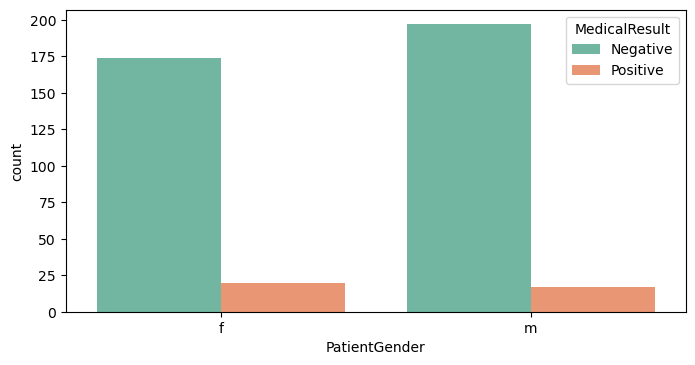

In [17]:
# PatientGender value counts
print(df['PatientGender'].value_counts())
# Countplot PatientGender berdasarkan  Medical result
plt.figure(figsize=(8,4), dpi=100)
sns.countplot(data=df, x='PatientGender', hue='MedicalResult', palette='Set2')
#plt.savefig('Gender Countplot', bbox_inches='tight');

- Jumlah customer pria sedikit lebih banyak dalam melakukan test covid, hasil Positif dari uji test covid antara pria dan wanita relatif sama.

### Amount

In [18]:
branch_amount = pd.DataFrame(df.groupby('Branch', as_index=False).sum())[['Branch','GrandTotal', 'TotalAmount', 'TotalDiscount']].sort_values('GrandTotal', ascending=False)
branch_amount

,Branch,GrandTotal,TotalAmount,TotalDiscount
3,ClinicACov Cikarang Pusat,163191000.0,163652683.0,309700.0
1,ClinicACov Bekasi Timur,24018000.0,23922400.0,259700.0
7,ClinicACov Margonda,18850000.0,18057250.0,900000.0
4,ClinicACov Cikarang Selatan,16422000.0,16562650.0,29850.0
0,ClinicACov Bekasi Selatan,10500000.0,10517850.0,0.0
6,ClinicACov Cileungsi,6125000.0,6163550.0,29850.0
5,ClinicACov Cikarang Utara,4600000.0,4605700.0,0.0
2,ClinicACov Cibubur,3500000.0,3511400.0,0.0


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'ClinicACov Cikarang Pusat'),
  Text(1, 0, 'ClinicACov Bekasi Timur'),
  Text(2, 0, 'ClinicACov Margonda'),
  Text(3, 0, 'ClinicACov Cikarang Selatan'),
  Text(4, 0, 'ClinicACov Bekasi Selatan'),
  Text(5, 0, 'ClinicACov Cileungsi'),
  Text(6, 0, 'ClinicACov Cikarang Utara'),
  Text(7, 0, 'ClinicACov Cibubur')])

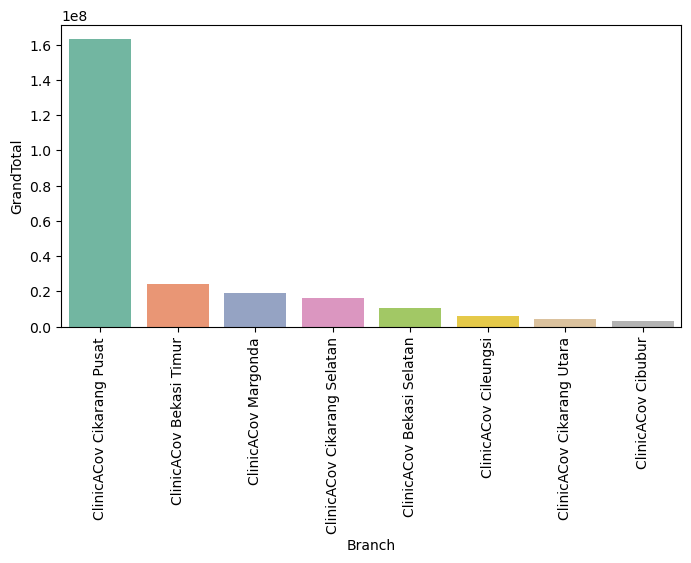

In [19]:
plt.figure(figsize=(8,4), dpi=100)
sns.barplot(data=branch_amount, x='Branch', y='GrandTotal', palette='Set2')
plt.xticks(rotation = 90)
#plt.savefig('GrandTotal Branch Barplot', bbox_inches='tight');

In [20]:
print(df['Branch'].value_counts())

ClinicACov Cikarang Pusat      242
ClinicACov Cikarang Selatan     59
ClinicACov Bekasi Timur         58
ClinicACov Cileungsi            24
ClinicACov Margonda             13
ClinicACov Bekasi Selatan        6
ClinicACov Cibubur               4
ClinicACov Cikarang Utara        2
Name: Branch, dtype: int64


- Cikarang Pusat adalah branch dengan pendapatan paling besar, diikuti oleh Bekasi Timur dan Margonda. Branch Margonda memberikan discount paling besar tetapi tidak menjadi branch dengan pendapatan tertinggi.
- Cileungsi memberikan diskon yang sama dengan Cikarang Selatan tetapi tidak memberikan penghasilan yang signifikan, bahkan lebih kecil dari Bekasi Selatan yang tidak diberikan diskon
- Customer Bekasi Timur tidak jauh berbeda dari Cikarang Selatan tetapi pendapatan dari Bekasi Timur signifikan lebih besar dibanding Cikarang Selatan.

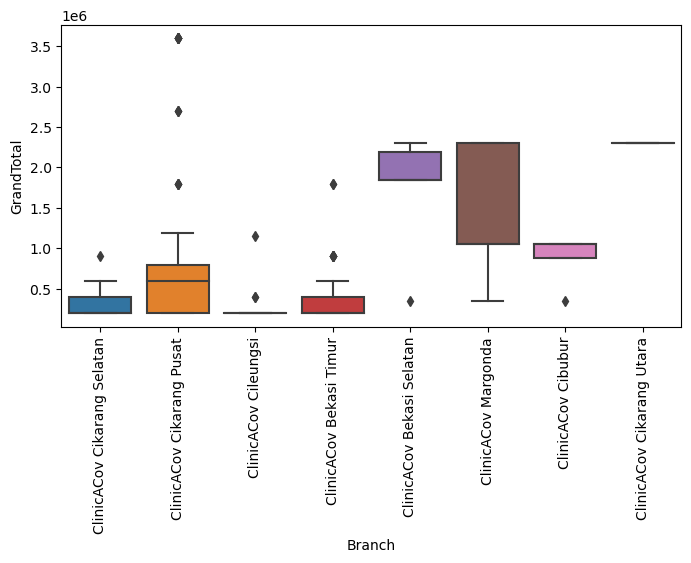

In [21]:
# Boxplot Branch vs GrandTotal
plt.figure(figsize=(8,4), dpi=100)
sns.boxplot(data=df, x='Branch', y='GrandTotal')
plt.xticks(rotation=90);

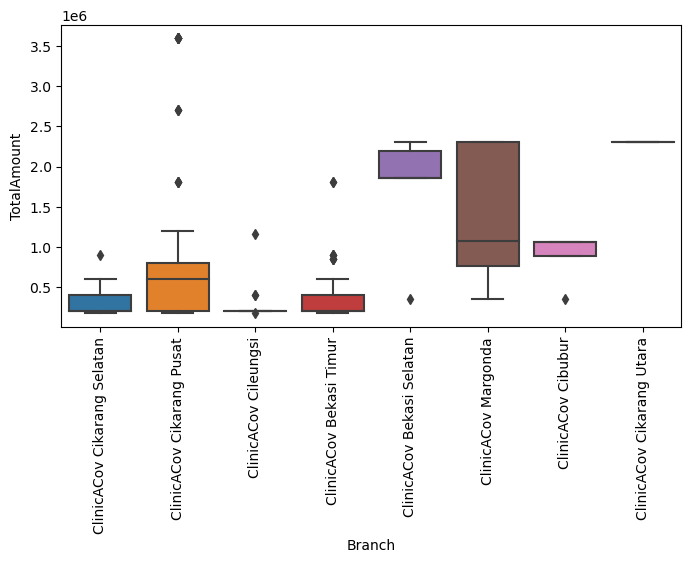

In [22]:
# Boxplot Branch vs TotalAmount
plt.figure(figsize=(8,4), dpi=100)
sns.boxplot(data=df, x='Branch', y='TotalAmount')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='GrandTotal', ylabel='TotalAmount'>

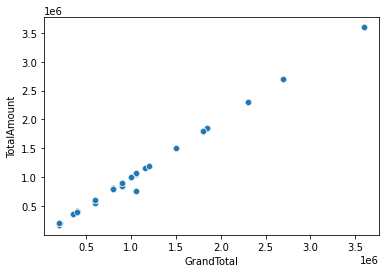

In [23]:
# Scatterplot GrandTotal vs TotalAmount
sns.scatterplot(data=df, x='GrandTotal', y='TotalAmount')

- Terdapat outlier pada GrandTotal dan TotalAmount

### Outliers on GrandTotal and TotalAmount

<AxesSubplot:xlabel='GrandTotal'>

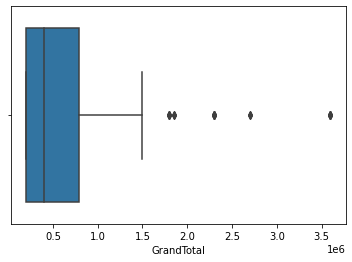

In [24]:
#Boxplot variabel Grand Total
sns.boxplot(data=df, x='GrandTotal')

In [25]:
#perhitungan IQR GrandTotal
percentile25 = df['GrandTotal'].quantile(0.25)
percentile75 = df['GrandTotal'].quantile(0.75)
IQR = percentile75-percentile25

lower_limit = percentile25 - 1.5 * IQR
upper_limit = percentile75 + 1.5 * IQR
# fungsi capping untuk membatasi outlier pada variabel GrandTotal
df['GrandTotal'] = np.where( df['GrandTotal'] > upper_limit,
                            upper_limit, df['GrandTotal'])

<AxesSubplot:xlabel='GrandTotal'>

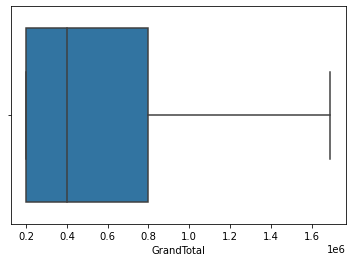

In [26]:
# Boxplot setelah capping outliers
sns.boxplot(data=df, x='GrandTotal')

<AxesSubplot:xlabel='TotalAmount'>

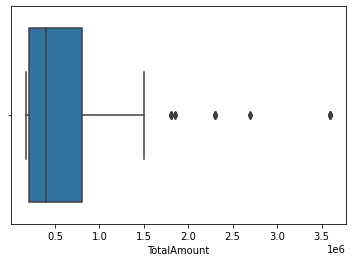

In [27]:
sns.boxplot(data=df, x='TotalAmount')
#plt.savefig('TotalAmount Boxplot Outliers', bbox_inches='tight');

In [28]:
#perhitungan IQR TotalAmount
percentile25 = df['TotalAmount'].quantile(0.25)
percentile75 = df['TotalAmount'].quantile(0.75)
IQR = percentile75-percentile25

lower_limit = percentile25 - 1.5 * IQR
upper_limit = percentile75 + 1.5 * IQR
# fungsi capping untuk membatasi outlier pada variabel GrandTotal
df['TotalAmount'] = np.where( df['TotalAmount'] > upper_limit,
                            upper_limit, df['TotalAmount'])

In [29]:
upper_limit

1694350.0

<AxesSubplot:xlabel='TotalAmount'>

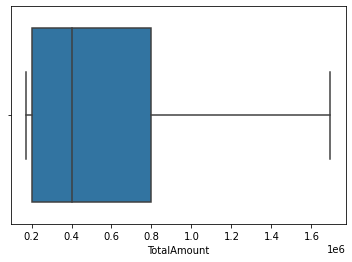

In [30]:
sns.boxplot(data=df, x='TotalAmount')
#plt.savefig('TotalAmount Boxplot Capping', bbox_inches='tight');

### Day Name Test, Date Number Test, and AgeRange

In [31]:
# Kolom DayName untuk nama hari pembuatan order
df['DayName'] = df['OrderCreated'].apply(lambda date: pd.to_datetime(date).day_name())

In [32]:
# Kolom DayName untuk tanggal pembuatan order
df['DateNum'] = df['OrderCreated'].apply(lambda date: pd.to_datetime(date).strftime("%d"))

**klasifikasi usia menurut berdasarkan kelompok umur produktif kerja:**

- Usia  Belum Aktif Kerja:  0–17  Tahun
- Usia Aktif Kerja:  18–60  Tahun
- Usia Pensiun:  >60  Tahun

In [33]:
# fungsi klasifikasi usia customer
def age_range(age):
    if age < 18: # usia dibawah produktif kerja
        return '0-17 Years'
    elif age < 61:
        return '18-60 Years' # Usia produktif kerja
    else:
        return 'Over 60 Years' # Usia diatas produktif kerja

# Kolom AgeRange untuk klasifikasi usia customer
df['AgeRange'] = df['Age'].apply(age_range)

In [34]:
df.head()

,TrxNumber,TrxType,Branch,Package,PatientBirthDate,PatientGender,PromoCode,GrandTotal,TotalDiscount,AdminFee,TotalAmount,OrderCreated,MedicalResult,Age,DayName,DateNum,AgeRange
0,1389414778136428544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1997-12-11,f,-,199000.0,0,3000,202000.0,2021-05-04 10:01:11,Negative,24,Tuesday,04,18-60 Years
2,1389442470126813184,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1998-08-17,m,-,199000.0,0,3000,202000.0,2021-05-04 11:51:14,Negative,23,Tuesday,04,18-60 Years
3,1389442470126813184,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1998-08-17,m,-,199000.0,0,3000,202000.0,2021-05-04 11:51:14,Positive,23,Tuesday,04,18-60 Years
4,1389589423187820544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1987-03-06,f,-,199000.0,0,2850,201850.0,2021-05-04 21:35:10,Negative,34,Tuesday,04,18-60 Years
5,1389494356792049664,on ClinicACov stand,ClinicACov Cikarang Pusat,Swab Antigen on ClinicACov stand (Result in 30...,1977-10-17,m,-,796000.0,0,2850,798850.0,2021-05-04 15:17:24,Negative,44,Tuesday,04,18-60 Years


<Figure size 720x360 with 0 Axes>

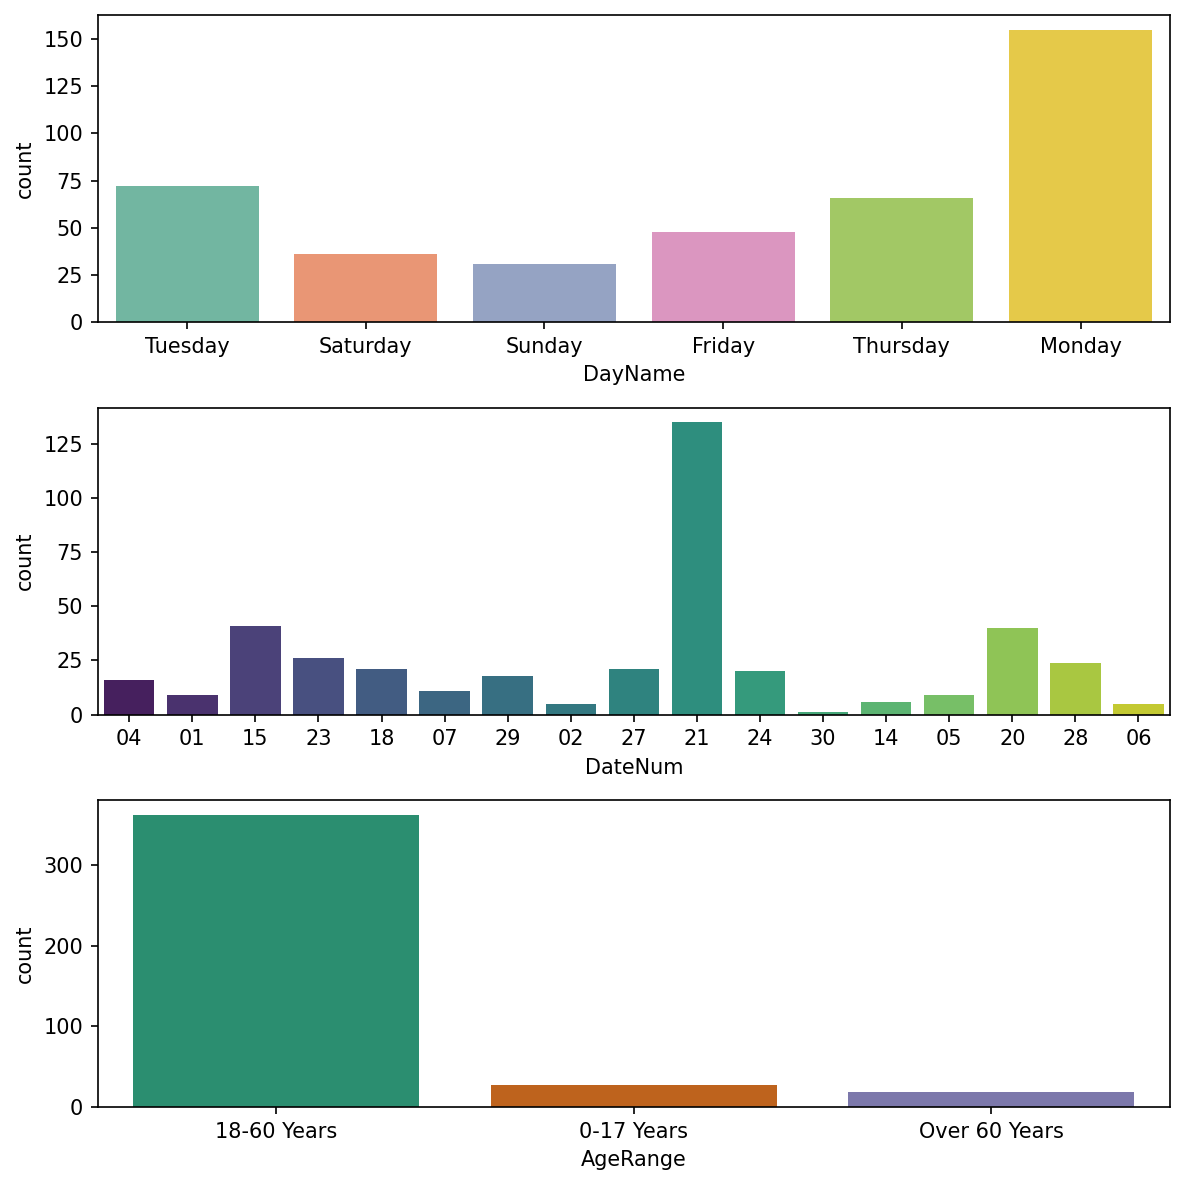

In [35]:
plt.figure(figsize=(10,5))
fig,axes = plt.subplots(figsize=(8,8), dpi=150,nrows = 3, ncols = 1)
sns.countplot(data=df, x='DayName',ax=axes[0], palette='Set2')
sns.countplot(data=df, x='DateNum',ax=axes[1], palette='viridis')
sns.countplot(data=df, x='AgeRange',ax=axes[2], palette='Dark2')
plt.tight_layout()
plt.savefig('Dayname Datenum Agerange', bbox_inches='tight');

- Test Covid paling banyak dilakukan pada hari Senin, diikuti hari Selasa dan Kamis
- Tanggal 21 merupakan tanggal yang paling banyak dilakukan test Covid
- Rentang usia paling banyak melakukan test Covid adalah usia produktif kerja

In [36]:
df['DateNum'] = df['DateNum'].astype(int)

In [37]:
# fungsi klasifikasi usia customer
def week_range(day):
    if day < 8: # usia dibawah produktif kerja
        return 'Week I'
    elif day < 15:
        return 'Week II' # Usia produktif kerja
    elif day < 22:
        return 'Week III' # Usia produktif kerja
    else:
        return 'Week IV' # Usia diatas produktif kerja

# Kolom AgeRange untuk klasifikasi usia customer
df['Week'] = df['DateNum'].apply(week_range)

In [38]:
df.head()

,TrxNumber,TrxType,Branch,Package,PatientBirthDate,PatientGender,PromoCode,GrandTotal,TotalDiscount,AdminFee,TotalAmount,OrderCreated,MedicalResult,Age,DayName,DateNum,AgeRange,Week
0,1389414778136428544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1997-12-11,f,-,199000.0,0,3000,202000.0,2021-05-04 10:01:11,Negative,24,Tuesday,4,18-60 Years,Week I
2,1389442470126813184,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1998-08-17,m,-,199000.0,0,3000,202000.0,2021-05-04 11:51:14,Negative,23,Tuesday,4,18-60 Years,Week I
3,1389442470126813184,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1998-08-17,m,-,199000.0,0,3000,202000.0,2021-05-04 11:51:14,Positive,23,Tuesday,4,18-60 Years,Week I
4,1389589423187820544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1987-03-06,f,-,199000.0,0,2850,201850.0,2021-05-04 21:35:10,Negative,34,Tuesday,4,18-60 Years,Week I
5,1389494356792049664,on ClinicACov stand,ClinicACov Cikarang Pusat,Swab Antigen on ClinicACov stand (Result in 30...,1977-10-17,m,-,796000.0,0,2850,798850.0,2021-05-04 15:17:24,Negative,44,Tuesday,4,18-60 Years,Week I


In [39]:
# Data frame baru untuk membangun model klasifikasi
df_set = df.drop(['TrxType','TrxNumber','PromoCode', 'AdminFee', 'PatientBirthDate', 'TotalDiscount', 
                          'GrandTotal', 'OrderCreated', 'Age'], axis=1)

## Feature Engineering

In [40]:
df_set = df_set[['Branch', 'Package', 'DayName', 'Week', 'AgeRange', 'DateNum', 'TotalAmount', 'MedicalResult']]
df_set.head()

,Branch,Package,DayName,Week,AgeRange,DateNum,TotalAmount,MedicalResult
0,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,Tuesday,Week I,18-60 Years,4,202000.0,Negative
2,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,Tuesday,Week I,18-60 Years,4,202000.0,Negative
3,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,Tuesday,Week I,18-60 Years,4,202000.0,Positive
4,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,Tuesday,Week I,18-60 Years,4,201850.0,Negative
5,ClinicACov Cikarang Pusat,Swab Antigen on ClinicACov stand (Result in 30...,Tuesday,Week I,18-60 Years,4,798850.0,Negative


In [41]:
# Definisi variabel X dan y
X = df_set.drop('MedicalResult', axis=1)
y = df_set['MedicalResult']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Data train dan data test dengan persentase data test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [44]:
# Jumlah Negative dan Positive pada data variabel y test
y_test.value_counts()

Negative    116
Positive      7
Name: MedicalResult, dtype: int64

## SMOTE Resampling

In [45]:
print(f"Before SMOTE, counts of label 'Positive': {sum(y_train=='Positive')}")
print(f"Before SMOTE, Counts of label 'Negative': {sum(y_train=='Negative')}")

Before SMOTE, counts of label 'Positive': 30
Before SMOTE, Counts of label 'Negative': 255


In [46]:
from imblearn.over_sampling import SMOTENC

In [47]:
X_train.dtypes=='object'

Branch          True
Package         True
DayName         True
Week            True
AgeRange        True
DateNum        False
TotalAmount    False
dtype: bool

In [48]:
smnc = SMOTENC(
    sampling_strategy='auto', # samples only the minority class
    random_state=0,  # for reproducibility
    n_jobs=4,
    categorical_features=X_train.dtypes=='object' # indeces of the columns of categorical variables
)  

X_train_smote, y_train_smote = smnc.fit_resample(X_train, y_train)

In [49]:
print(f"After SMOTE, X_train shape: {sum(X_train_smote.shape)}")
print(f"After SMOTE, y_train shape: {sum(y_train_smote.shape)}")
print(f"After SMOTE, counts of label 'Positive': {sum(y_train_smote=='Positive')}")
print(f"After SMOTE, Counts of label 'Negative': {sum(y_train_smote=='Negative')}")

After SMOTE, X_train shape: 517
After SMOTE, y_train shape: 510
After SMOTE, counts of label 'Positive': 255
After SMOTE, Counts of label 'Negative': 255


In [50]:
X_train_smote.reset_index(inplace=True)
X_train_smote.drop('index', axis=1, inplace=True)
X_train_smote.head()

,Branch,Package,DayName,Week,AgeRange,DateNum,TotalAmount
0,ClinicACov Cikarang Pusat,Swab Antigen on ClinicACov stand (Result in 30...,Monday,Week III,18-60 Years,21,796000.0
1,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,Monday,Week III,18-60 Years,21,202000.0
2,ClinicACov Cileungsi,Swab Antigen on ClinicACov stand (Result in 30...,Monday,Week III,18-60 Years,21,172000.0
3,ClinicACov Cikarang Pusat,Swab Antigen on ClinicACov stand (Result in 30...,Monday,Week III,18-60 Years,21,799000.0
4,ClinicACov Cikarang Pusat,Swab Antigen on ClinicACov stand (Result in 30...,Monday,Week III,18-60 Years,21,400850.0


In [51]:
X_test.reset_index(inplace=True)
X_test.drop('index', axis=1, inplace=True)
X_test.head()

,Branch,Package,DayName,Week,AgeRange,DateNum,TotalAmount
0,ClinicACov Bekasi Timur,Swab Antigen on ClinicACov stand (Result in 30...,Monday,Week III,18-60 Years,21,201850.0
1,ClinicACov Cikarang Pusat,Swab Antigen on ClinicACov stand (Result in 30...,Tuesday,Week III,18-60 Years,15,201850.0
2,ClinicACov Cileungsi,Swab Antigen on ClinicACov stand (Result in 30...,Tuesday,Week III,18-60 Years,18,201850.0
3,ClinicACov Cikarang Pusat,Swab Antigen on ClinicACov stand (Result in 30...,Friday,Week IV,18-60 Years,28,599850.0
4,ClinicACov Bekasi Timur,Swab Antigen on ClinicACov stand (Result in 30...,Thursday,Week I,18-60 Years,6,201850.0


In [52]:
train_objs_num = len(X_train_smote)
train_objs_num

510

In [53]:
dataset = pd.concat(objs=[X_train_smote, X_test], axis=0)

In [54]:
df_enc = df_set.copy()
df_enc.head()

,Branch,Package,DayName,Week,AgeRange,DateNum,TotalAmount,MedicalResult
0,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,Tuesday,Week I,18-60 Years,4,202000.0,Negative
2,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,Tuesday,Week I,18-60 Years,4,202000.0,Negative
3,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,Tuesday,Week I,18-60 Years,4,202000.0,Positive
4,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,Tuesday,Week I,18-60 Years,4,201850.0,Negative
5,ClinicACov Cikarang Pusat,Swab Antigen on ClinicACov stand (Result in 30...,Tuesday,Week I,18-60 Years,4,798850.0,Negative


In [55]:
map = {'Negative':0, 'Positive':1}
df_enc['MedicalResult'] = df_enc['MedicalResult'].map(map)

In [56]:
branch_enc = df_enc.groupby(['Branch'])['MedicalResult'].mean().to_dict()
branch_enc

{'ClinicACov Bekasi Selatan': 0.0,
 'ClinicACov Bekasi Timur': 0.06896551724137931,
 'ClinicACov Cibubur': 0.0,
 'ClinicACov Cikarang Pusat': 0.10743801652892562,
 'ClinicACov Cikarang Selatan': 0.06779661016949153,
 'ClinicACov Cikarang Utara': 0.0,
 'ClinicACov Cileungsi': 0.041666666666666664,
 'ClinicACov Margonda': 0.15384615384615385}

In [57]:
package_enc = df_enc.groupby(['Package'])['MedicalResult'].mean().to_dict()
package_enc

{'Swab Antigen Client Home (Result in 30Minutes)': 0.0,
 'Swab Antigen on ClinicACov stand (Result in 30Minutes)': 0.06936416184971098,
 'Swab PCR Client Home (Result in D+1)': 0.2727272727272727,
 'Swab PCR on ClinicACov stand (Result in 1x24Hours)': 0.2777777777777778}

In [58]:
dayname_enc = df_enc.groupby(['DayName'])['MedicalResult'].mean().to_dict()
dayname_enc

{'Friday': 0.0,
 'Monday': 0.18064516129032257,
 'Saturday': 0.0,
 'Sunday': 0.03225806451612903,
 'Thursday': 0.0,
 'Tuesday': 0.1111111111111111}

In [59]:
week_enc = df_enc.groupby(['Week'])['MedicalResult'].mean().to_dict()
week_enc

{'Week I': 0.01818181818181818,
 'Week II': 0.0,
 'Week III': 0.14767932489451477,
 'Week IV': 0.00909090909090909}

In [60]:
agerange_enc = df_enc.groupby(['AgeRange'])['MedicalResult'].mean().to_dict()
agerange_enc

{'0-17 Years': 0.14814814814814814,
 '18-60 Years': 0.09116022099447514,
 'Over 60 Years': 0.0}

In [61]:
dataset['Branch'] = dataset['Branch'].map(branch_enc)
dataset['Package'] = dataset['Package'].map(package_enc)
dataset['DayName'] = dataset['DayName'].map(dayname_enc)
dataset['Week'] = dataset['Week'].map(week_enc)
dataset['AgeRange'] = dataset['AgeRange'].map(agerange_enc)

In [62]:
dataset

,Branch,Package,DayName,Week,AgeRange,DateNum,TotalAmount
0,0.107438,0.069364,0.180645,0.147679,0.09116,21,796000.0
1,0.067797,0.069364,0.180645,0.147679,0.09116,21,202000.0
2,0.041667,0.069364,0.180645,0.147679,0.09116,21,172000.0
3,0.107438,0.069364,0.180645,0.147679,0.09116,21,799000.0
4,0.107438,0.069364,0.180645,0.147679,0.09116,21,400850.0
...,...,...,...,...,...,...,...
118,0.000000,0.272727,0.000000,0.018182,0.09116,1,1694350.0
119,0.107438,0.069364,0.111111,0.147679,0.00000,15,599850.0
120,0.107438,0.277778,0.111111,0.147679,0.09116,15,1694350.0
121,0.107438,0.069364,0.111111,0.147679,0.09116,15,201850.0


In [63]:
X_train_smote = dataset[:train_objs_num]
X_test = dataset[train_objs_num:]

In [64]:
X_train_smote.head()

,Branch,Package,DayName,Week,AgeRange,DateNum,TotalAmount
0,0.107438,0.069364,0.180645,0.147679,0.09116,21,796000.0
1,0.067797,0.069364,0.180645,0.147679,0.09116,21,202000.0
2,0.041667,0.069364,0.180645,0.147679,0.09116,21,172000.0
3,0.107438,0.069364,0.180645,0.147679,0.09116,21,799000.0
4,0.107438,0.069364,0.180645,0.147679,0.09116,21,400850.0


In [65]:
X_test.head()

,Branch,Package,DayName,Week,AgeRange,DateNum,TotalAmount
0,0.068966,0.069364,0.180645,0.147679,0.09116,21,201850.0
1,0.107438,0.069364,0.111111,0.147679,0.09116,15,201850.0
2,0.041667,0.069364,0.111111,0.147679,0.09116,18,201850.0
3,0.107438,0.069364,0.000000,0.009091,0.09116,28,599850.0
4,0.068966,0.069364,0.000000,0.018182,0.09116,6,201850.0


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [67]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV

## Machine Learning Classifier Model

### Decision Tree Smote

In [68]:
# GridCV untuk Decision Tree Clasifier dengan data train resampling smote
dt = DecisionTreeClassifier(random_state=101, class_weight='balanced')
param_grid = {'max_depth':[3,4,5,6],
             'criterion':['gini','entropy'],
             'max_features':['auto', 'log2','None']}
grid_dt_smote = GridSearchCV(dt, param_grid)
grid_dt_smote.fit(X_train_smote,y_train_smote)

#Predict Decision Tree Classifier
dt_smote_predict = grid_dt_smote.predict(X_test)

#Classification report Decision Tree Classifier
print(classification_report(y_test, dt_smote_predict))

              precision    recall  f1-score   support

    Negative       1.00      0.68      0.81       116
    Positive       0.16      1.00      0.27         7

    accuracy                           0.70       123
   macro avg       0.58      0.84      0.54       123
weighted avg       0.95      0.70      0.78       123



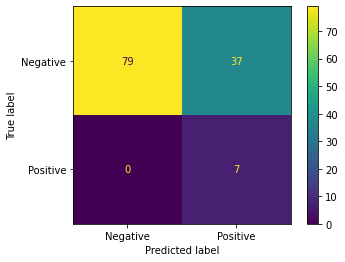

In [69]:
#Confusion Matrix Decision Tree Classifier dengan best parameter GridCV
plot_confusion_matrix(grid_dt_smote, X_test, y_test)

### Random Forrest Smote

In [101]:
# GridCV untuk Random Forrest Clasifier
RF = RandomForestClassifier(random_state=101)
param_grid = {'n_estimators':range(1,20),
             'max_depth':[3,4,5,6],
             'criterion':['gini','entropy'],
             'bootstrap':[True,False],
             'oob_score':[True,False]}
grid_rf_smote = GridSearchCV(RF, param_grid)
grid_rf_smote.fit(X_train_smote, y_train_smote)

#Predict Random Forrest Clasifier
grid_rf_smote_predict = grid_rf_smote.predict(X_test)

#Classification report Random Forrest Clasifier 
print(classification_report(y_test, grid_rf_smote_predict))

              precision    recall  f1-score   support

    Negative       0.98      0.89      0.93       116
    Positive       0.28      0.71      0.40         7

    accuracy                           0.88       123
   macro avg       0.63      0.80      0.67       123
weighted avg       0.94      0.88      0.90       123



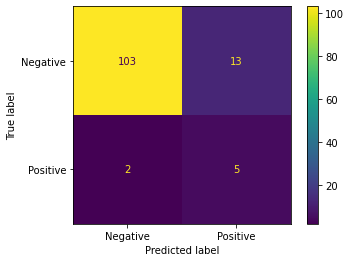

In [102]:
#Confusion Matrix Random Forrest Clasifier dengan best parameter GridCV
plot_confusion_matrix(grid_rf_smote, X_test, y_test)
#plt.savefig('Confusion Matrix GridCV', bbox_inches='tight');

### Gradient Boost Smote

In [72]:
# GridCV untuk Gradien Boost Classifier
gb = GradientBoostingClassifier(random_state=101)
param_grid = {'n_estimators':range(1,20),
              'max_depth':[4,5,6],
              'max_features':['auto', 'log2', None],
              'learning_rate':[0.1, 0.5, 1, 1.5, 2]}
grid_gb_smote = GridSearchCV(gb, param_grid)
grid_gb_smote.fit(X_train_smote, y_train_smote)

# GridCV untuk Gradien Boost Classifier
grid_gb_smote_predics = grid_gb_smote.predict(X_test)

#Classification report Gradien Boost Classifier #Predict Gradien Boost Classifier 
print(classification_report(y_test,grid_gb_smote_predics))

              precision    recall  f1-score   support

    Negative       0.97      0.91      0.94       116
    Positive       0.29      0.57      0.38         7

    accuracy                           0.89       123
   macro avg       0.63      0.74      0.66       123
weighted avg       0.93      0.89      0.91       123



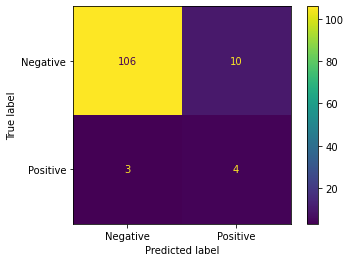

In [73]:
#Confusion Matrix Gradien Boost Classifier dengan best parameter GridCV
plot_confusion_matrix(grid_gb_smote, X_test, y_test)

### SVC Smote

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()
scaled_X_train_smote = scaler.fit_transform(X_train_smote)
scaled_X_test = scaler.transform(X_test)

In [76]:
# GridCV untuk Support Vector Classifier
svc = SVC(class_weight='balanced', random_state=101)
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1], 'gamma': ['scale', 'auto']}
grid_svc_smote = GridSearchCV(svc, param_grid)
grid_svc_smote.fit(scaled_X_train_smote,y_train_smote)

# Predict Support Vector Classifier 
# GridCV untuk Support Vector Classifier

grid_svc_smote_pred = grid_svc_smote.predict(scaled_X_test)

#Classification report Support Vector Classifier
print(classification_report(y_test, grid_svc_smote_pred))

              precision    recall  f1-score   support

    Negative       0.98      0.91      0.94       116
    Positive       0.31      0.71      0.43         7

    accuracy                           0.89       123
   macro avg       0.65      0.81      0.69       123
weighted avg       0.94      0.89      0.91       123



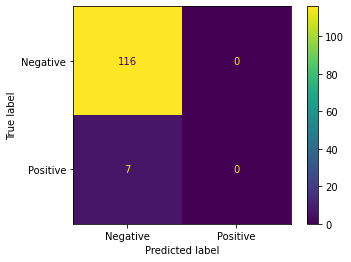

In [77]:
#Confusion Matrix Support Vector Classifier dengan best parameter GridCV
plot_confusion_matrix(grid_svc_smote, X_test, y_test)

### KNN Smote

In [78]:
# GridCV untuk KNN Classifier
knn = KNeighborsClassifier(metric='euclidean')
param_grid ={'n_neighbors':[3,5,10,20,25]}
grid_knn_smote = GridSearchCV(knn, param_grid, scoring = 'precision')
grid_knn_smote.fit(scaled_X_train_smote,y_train_smote)

# GridCV untuk KNN Classifier
grid_knn_smote_pred = grid_knn_smote.predict(scaled_X_test)

#Classification report KNN Classifier #Predict KNN Classifier 
print(classification_report(y_test,grid_knn_smote_pred))

              precision    recall  f1-score   support

    Negative       0.97      0.95      0.96       116
    Positive       0.40      0.57      0.47         7

    accuracy                           0.93       123
   macro avg       0.69      0.76      0.72       123
weighted avg       0.94      0.93      0.93       123



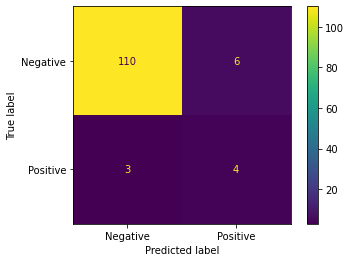

In [79]:
#Confusion Matrix KNN Classifier dengan best parameter GridCV
plot_confusion_matrix(grid_knn_smote, scaled_X_test, y_test)

### Naive Bayes Smote

In [80]:
# Naive Bayes Classifier model
nb_smote = GaussianNB()
nb_smote.fit(scaled_X_train_smote, y_train_smote)

#Predict Naive Bayes Classifier
nb_pred = nb_smote.predict(scaled_X_test)

#Classification report Naive Bayes Classifier 
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

    Negative       0.98      0.79      0.88       116
    Positive       0.17      0.71      0.28         7

    accuracy                           0.79       123
   macro avg       0.58      0.75      0.58       123
weighted avg       0.93      0.79      0.84       123



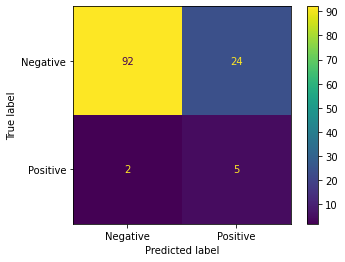

In [81]:
#Confusion Matrix NB Classifier dengan best parameter GridCV
plot_confusion_matrix(nb_smote, scaled_X_test, y_test)

- Random Forest dengan Smote random over sampling memberikan hasil terbaik dibandingkan dengan metode lainnya
- Nilai kombinasi nilai Accuracy score, recall score, dan F1-score dari model ini adalah yang paling baik

In [82]:
#Classification report Random Forest Classifier 
print(classification_report(y_test, grid_rf_smote_predict))

              precision    recall  f1-score   support

    Negative       0.98      0.89      0.93       116
    Positive       0.28      0.71      0.40         7

    accuracy                           0.88       123
   macro avg       0.63      0.80      0.67       123
weighted avg       0.94      0.88      0.90       123



In [103]:
# Best parameter dari GridCV Random Forest Clasifier
grid_rf_smote.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 6,
 'n_estimators': 6,
 'oob_score': True}

- Hasil parameter terbaik untuk metode Random Fores dengan nilai estimator 6.
- Selanjutnya dengan parameter terbaik ini akan dihitung kembali nilai accuracy score, precision score, dan f1-score. Ini dilakukan menggunakan nilai n_estimator dengan range(1,20). perhitungan ini dilakukan untuk mencari nilai n_estimator terbaik dengan nilai Recall score dan F1-score yang paling tinggi.

In [104]:
#perhitungan nilai error, recall score, F1-score dan accuracy score 
error_rf_smote = []
recall_rf_smote = []
f1score_rf_smote =[]
accuracy_score_rf_smote =[]

for n in range(1,20):
    Random = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=6, n_estimators=n, oob_score=True,
                                         random_state=10)
    Random.fit(X_train_smote, y_train_smote)
    Random_preds = Random.predict(X_test)
    
    err_Random = 1 - accuracy_score(y_test, Random_preds)
    error_rf_smote.append(err_Random)
    accuracy_score_rf_smote.append(accuracy_score(y_test, Random_preds))
    
    recall = recall_score(y_test, Random_preds, pos_label='Positive')
    recall_rf_smote.append(recall)
    
    f1score = f1_score(y_test, Random_preds, pos_label='Positive')
    f1score_rf_smote.append(f1score)

In [105]:
# Data frame nilai error, recall score, F1-score dan accuracy score
rf_smote_report = pd.DataFrame(data=[error_rf_smote, accuracy_score_rf_smote,recall_rf_smote, f1score_rf_smote],
                           columns=range(1,20), index=['Error', 'Accuracy','Recall', 'F1 Score']).T
rf_smote_report=rf_smote_report.sort_values(['Recall', 'F1 Score','Accuracy'], ascending=False)
rf_smote_report

,Error,Accuracy,Recall,F1 Score
14,0.121951,0.878049,0.714286,0.400000
4,0.130081,0.869919,0.714286,0.384615
16,0.130081,0.869919,0.714286,0.384615
17,0.130081,0.869919,0.714286,0.384615
1,0.138211,0.861789,0.714286,0.370370
10,0.138211,0.861789,0.714286,0.370370
11,0.138211,0.861789,0.714286,0.370370
12,0.138211,0.861789,0.714286,0.370370
13,0.138211,0.861789,0.714286,0.370370
15,0.138211,0.861789,0.714286,0.370370


Text(0.5, 0, 'N Estimators')

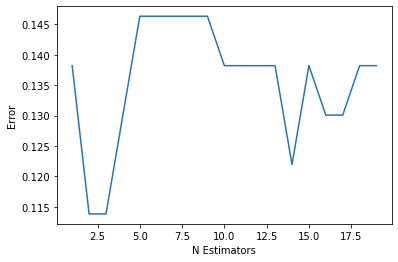

In [106]:
# Plot n_estimators vs error
plt.plot(range(1,20), error_rf_smote)
plt.ylabel('Error')
plt.xlabel('N Estimators')
#plt.savefig('n estimator', bbox_inches='tight');

In [108]:
# Model Random Forest Clasifier dengan parameter terbaik
rf_min = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=6, n_estimators=14, oob_score=True,
                                random_state=101)
rf_min.fit(X_train_smote, y_train_smote)
rf_min_preds = rf_min.predict(X_test)

#Confusion Matrix Random Forest Classifier dengan nilai n_estimators =13
print(classification_report(y_test, rf_min_preds))

              precision    recall  f1-score   support

    Negative       0.98      0.91      0.95       116
    Positive       0.33      0.71      0.45         7

    accuracy                           0.90       123
   macro avg       0.66      0.81      0.70       123
weighted avg       0.94      0.90      0.92       123



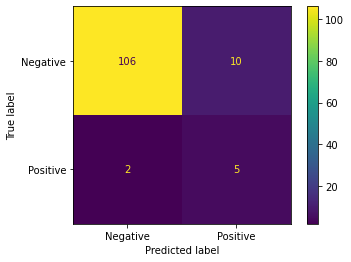

In [109]:
#Confusion Matrix Random Forest Classifier
plot_confusion_matrix(rf_min, X_test, y_test)
#plt.savefig('conf best matrix', bbox_inches='tight');

In [110]:
#feature impoertance dari model Random Forest terbaik
rf_min.feature_importances_

array([0.11899788, 0.00943235, 0.40053317, 0.1645547 , 0.03821144,
       0.11183102, 0.15643943])

In [111]:
#feature impoertance data frame
feat_imp = rf_min.feature_importances_
feat_imp_rf = pd.DataFrame(data = feat_imp, index = X_train_smote.columns, columns=['Importance']).sort_values(by='Importance')
feat_imp_rf

,Importance
Package,0.009432
AgeRange,0.038211
DateNum,0.111831
Branch,0.118998
TotalAmount,0.156439
Week,0.164555
DayName,0.400533


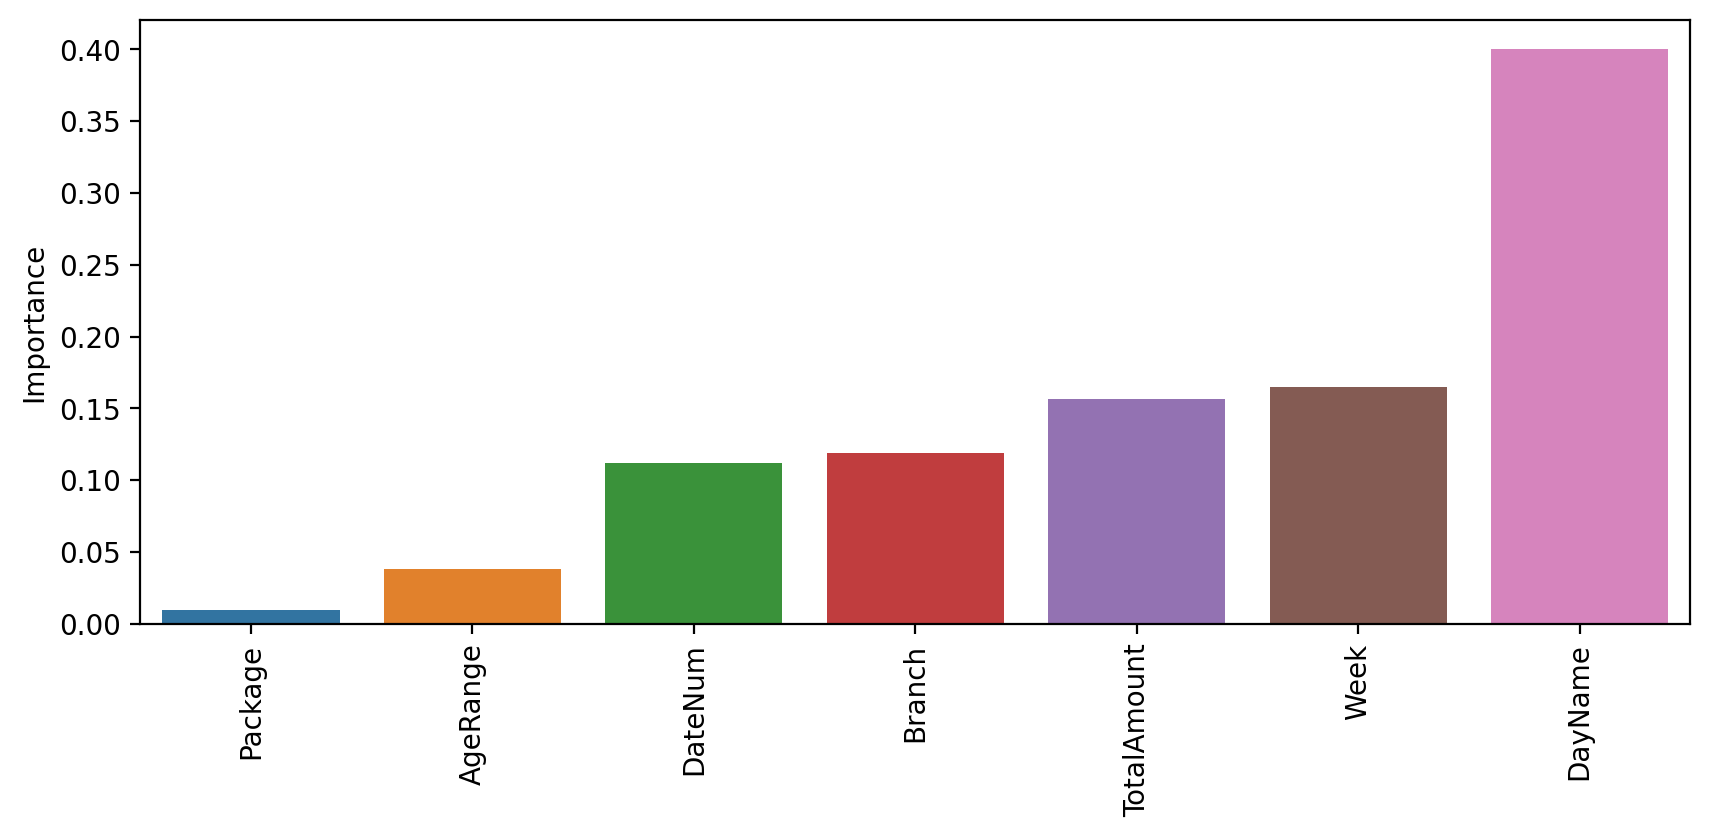

In [112]:
#plot feature importtances
plt.figure(figsize=(10,4), dpi=200)
sns.barplot(data=feat_imp_rf, x=feat_imp_rf.index, y='Importance')
plt.xticks(rotation=90);

## Branch Predict

- Model akan digunakan untuk memprediksi gambaran hasil uji test covid berdasarkan kombinasi karakteristik tiap Branch.
- Tiap Branch memiliki Package,DayNam, DateNum, dan AgeRange yang berbeda-beda dan tiap karakteristik ini akan menjadi batasan untuk mengetahui gambaran hasil uji test covid Positive tiap Branch.

In [115]:
# Fungsi expand grid
from itertools import product

def expand_grid(dictionary):
   return pd.DataFrame([row for row in product(*dictionary.values())], 
                       columns=dictionary.keys())

In [116]:
df_set.columns

Index(['Branch', 'Package', 'DayName', 'Week', 'AgeRange', 'DateNum',
       'TotalAmount', 'MedicalResult'],
      dtype='object')

### All Branch

In [119]:
#Dataframe model
data_model = df.drop(['TrxType','TrxNumber','PromoCode', 'AdminFee', 'PatientBirthDate', 'TotalDiscount', 
                      'GrandTotal', 'OrderCreated', 'Age'], axis=1)


dict = {'Branch': data_model['Branch'].unique().tolist(),
        'Package': data_model['Package'].unique().tolist(),
        'DayName':data_model['DayName'].unique().tolist(),
        'Week':data_model['Week'].unique().tolist(),
        'AgeRange':data_model['AgeRange'].unique().tolist(),
        'DateNum':data_model['DateNum'].unique().tolist(),
        'TotalAmount':data_model['TotalAmount'].unique().tolist()
           }
#Expand grid untuk membuat dataframe combinasi semua label kolom
expand = expand_grid(dict)

#Append dataframe expand grid kedalam dataframe model berdasarkan tiap kolom
append_encoder = expand.copy()
    
#Label encoding untuk variabel kategori
append_encoder['Branch'] = append_encoder['Branch'].map(branch_enc)
append_encoder['Package'] = append_encoder['Package'].map(package_enc)
append_encoder['DayName'] = append_encoder['DayName'].map(dayname_enc)
append_encoder['Week'] = append_encoder['Week'].map(week_enc)
append_encoder['AgeRange'] = append_encoder['AgeRange'].map(agerange_enc)
    
#Prediksi data branch yang sudah dilabel
branch_pred = rf_min.predict(append_encoder)
    
#Menggabungkan data hasil prediksi dengan dataframe tiap cabang
MedicalResult = pd.DataFrame(branch_pred, columns=['MedicalResult_predict'])
branch_concat = pd.concat([expand,MedicalResult], axis=1)
#Mengambil data yang menghasilkan prediksi Positive
positive = branch_concat[branch_concat['MedicalResult_predict']=='Positive']
    
#Value count variabel Package
package_val = positive['Package'].value_counts()
#Value count variabel DayName
dayname_val = positive['DayName'].value_counts()
#Value count variabel DateNum
week_val = positive['Week'].value_counts()
#Value count variabel AgeRange
agerange_val = positive['AgeRange'].value_counts()
    
print('All Branch')
print('- Package positive value count : \n{} \n'.format(package_val))
print('- Day name positive value count : \n{} \n'.format(dayname_val))
print('- Week positive value count : \n{} \n'.format(week_val))
print('- Age range positive value count : \n{} \n'.format(agerange_val))
    
print('======================================================================================================\n')

All Branch
- Package positive value count : 
Swab PCR Client Home (Result in D+1)                      3882
Swab Antigen on ClinicACov stand (Result in 30Minutes)    3861
Swab Antigen Client Home (Result in 30Minutes)            3751
Swab PCR on ClinicACov stand (Result in 1x24Hours)        3374
Name: Package, dtype: int64 

- Day name positive value count : 
Monday      14386
Tuesday       334
Sunday         40
Saturday       36
Friday         36
Thursday       36
Name: DayName, dtype: int64 

- Week positive value count : 
Week III    14836
Week II        16
Week IV        16
Name: Week, dtype: int64 

- Age range positive value count : 
18-60 Years      6647
Over 60 Years    6514
0-17 Years       1707
Name: AgeRange, dtype: int64 




In [130]:
positive['Week'].unique()

array(['Week III', 'Week IV', 'Week II'], dtype=object)

In [133]:
positive[positive['Week'] == 'Week II']

,Branch,Package,DayName,Week,AgeRange,DateNum,TotalAmount,MedicalResult_predict
206822,ClinicACov Cikarang Pusat,Swab Antigen on ClinicACov stand (Result in 30...,Monday,Week II,18-60 Years,20,202000.0,Positive
207978,ClinicACov Cikarang Pusat,Swab Antigen on ClinicACov stand (Result in 30...,Monday,Week II,Over 60 Years,20,202000.0,Positive
248438,ClinicACov Cikarang Pusat,Swab PCR on ClinicACov stand (Result in 1x24Ho...,Monday,Week II,18-60 Years,20,202000.0,Positive
249594,ClinicACov Cikarang Pusat,Swab PCR on ClinicACov stand (Result in 1x24Ho...,Monday,Week II,Over 60 Years,20,202000.0,Positive
290054,ClinicACov Cikarang Pusat,Swab PCR Client Home (Result in D+1),Monday,Week II,18-60 Years,20,202000.0,Positive
291210,ClinicACov Cikarang Pusat,Swab PCR Client Home (Result in D+1),Monday,Week II,Over 60 Years,20,202000.0,Positive
331670,ClinicACov Cikarang Pusat,Swab Antigen Client Home (Result in 30Minutes),Monday,Week II,18-60 Years,20,202000.0,Positive
332826,ClinicACov Cikarang Pusat,Swab Antigen Client Home (Result in 30Minutes),Monday,Week II,Over 60 Years,20,202000.0,Positive
872678,ClinicACov Margonda,Swab Antigen on ClinicACov stand (Result in 30...,Monday,Week II,18-60 Years,20,202000.0,Positive
873834,ClinicACov Margonda,Swab Antigen on ClinicACov stand (Result in 30...,Monday,Week II,Over 60 Years,20,202000.0,Positive
